In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Only considering binary trees
def gini(p):
    return p*(1-p) +(1-p)*(1-(1-p))

def entropy(p):
    return - p*np.log2(p) - (1-p)*np.log2(1-p)

def classificationError(p):
    return 1 - np.max([p,1-p])

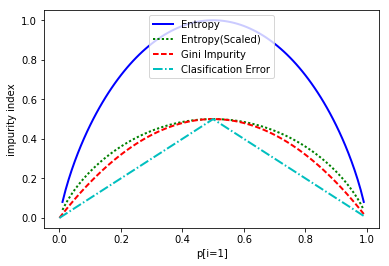

In [3]:
#Visual Comparision of three diffrent impurity criteria
x = np.arange(0,1,0.01)
err = [classificationError(i) for i in x]
ent = [entropy(p) if p !=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
fig  = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                        ['Entropy', 'Entropy(Scaled)', 'Gini Impurity', 'Clasification Error'],
                        ['solid', 'dotted', 'dashed', 'dashdot'],
                        ['b','g','r','c']):
    line = ax.plot(x,i,label = lab, color = c,linestyle=ls, lw =  2)

ax.legend(loc = 'upper center')
plt.xlabel('p[i=1]')
plt.ylabel('impurity index')

In [4]:
from sklearn import datasets
#loading iris dataset setting petal and sepal length as feature matrix and class label as targets
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
#Splitting the dataset in test ans train dataset to test aor model's performance on unseen data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 1, stratify = y)
#stratify function ensures all the classes have equal proportion of representaion in both test and train sets
# performing feature scaling for better preformance of the optimizer
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # fit method will estimate the parameters mean and standars deviation of the sample given
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from matplotlib.colors import ListedColormap
def plotDecisionRegion(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1,X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1,X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max, resolution))
    #xx1, xx2 are the coordinates of x and y respectively, we pair each value of the two corresponding matrices and get a grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x =X[y==c1,0],
                    y = X[y==c1,1],
                    alpha =0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = c1, edgecolor='black')
    
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c= '', edgecolors='black',
                    alpha=1.0, linewidths=1, marker='o', s=100, label='test set')

In [6]:
#Feature scalling is not required for Decision Tree ALgorithm
from sklearn.tree import DecisionTreeClassifier

In [7]:
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=1)

In [8]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

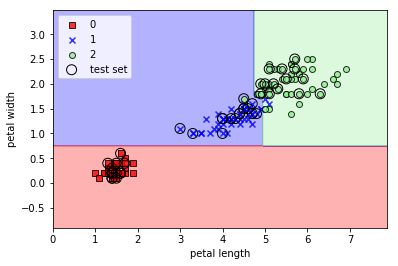

In [9]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plotDecisionRegion(X_combined, y_combined, classifier=tree_model, test_idx=range(105,150))
plt.legend(loc = 'upper left')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [10]:
#plotting decision tree using inbuilt method in sklearn
from sklearn im

In [12]:
# have older version of sklearn plot_tree is available in 0.21 and this is 0.20
tree.plot_tree(tree_model)
plt.show()

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

In [1]:
import sklearn

ImportError: DLL load failed: The specified module could not be found.